<a href="https://colab.research.google.com/github/joliebao/TCS-Data-Science-Obesity/blob/main/TCS_DataScience_Obesity_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# **Contributing Factors of Obesity**


---




#Abstract

Obesity is a large concern for society for causing major health issues for individuals considered obese. While most people concern obesity with visual factors, there are many features related to extreme weight gain. To decrease the rates of obesity, it is imperative to know which categories are most causal of obesity. For this analysis, a dataset from UC Irvine on the Obesity Levels of Individuals in Mexico, Peru, and Columbia was cleaned, plotted, and modeled. The results show that although each variable within the data set generally had little direct correlation to an obesity classification, they were all related to one another. This dataset presented conventionally indeterminate results for reasons that there are missing data and a lack of standardization in taking the survey.



---


#Background

Obesity is a growing global health issue that will continue to grow as living standards rise. It is classified as an abnormal accumulation of fat and an eating disorder caused by unhealthy lifestyles and bad eating habits. Moreover, obesity can lead to degrading health: sensory changes, decreased productivity, increased cardiovascular conditions, metabolic abnormalities, and generally an increased chance of developing chronic diseases.

While obesity seems to be a physical concern, there are also ties to socioeconomic issues. Obesity is most commonly found in minority groups: ethnic or racial minorities, women, and lower class individuals. Some of these factors can be attributed to stress and unfair treatment received by society or food insecurity during childhood. Children themselves may also face obesity from direct interaction with an obesefamily as they build the same habits.

This data set has come from UC Irvine's 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition' dataset. Collecting data from people living in Mexico, Peru, and Columbia.


***Research Question***

***Which lifestyle conditions are most strongly associated with obesity and how can interpretable models use these factors to predict an individual’s obesity level?***

***Importing***

In [ ]:
#importing libraries and cloning repo

!git clone https://github.com/joliebao/TCS-Data-Science-Obesity

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs

Cloning into 'TCS-Data-Science-Obesity'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 61 (delta 30), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (61/61), 3.72 MiB | 7.06 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [ ]:
# convert downloaded dataset into accessible dataset
url = 'https://raw.githubusercontent.com/joliebao/TCS-Data-Science-Obesity/refs/heads/main/ObesityDataSet.csv'
df = pd.read_csv(url)

**Key Columns:**

  + Gender: Biological sex of the individual

  + Age: Age in years

  + Height: Height in meters

  + Weight: Weight in kilograms

  + Family_history_with_overweight: Overweight in immediate family

  + FAVC: Eats high-calorie foods frequently

  + FCVC: Frequency of vegetable consumption

  + NCP: Number of daily main meals

  + CAEC: Eats between meals

  + SMOKE: Smokes regularly

  + CH2O: Daily water intake

  + SCC: Monitors daily calorie intake

  + FAF: Weekly physical activity frequency

  + TUE: Daily screen time usage

  + CALC: Alcohol consumption frequency

  + MTRANS: Main transportation method

  + NObeyesdad: Obesity classification label


***Data Cleaning***

The data set is tested to be as fair and as consistent as possible. Data set has been determined to be generally clean!

In [ ]:
df.isna()             # again all filled out! (all non-null)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# GETTING RID OF DUPLICATES
print(df.duplicated().sum()) # Because there are 24 duplicates, they needed to
                             # be removed to decrease bias.
df = df.drop_duplicates()

24


In [ ]:
df.shape  # the duplicates were properly removed!

(2087, 17)

In [ ]:
# CHECKING VARIANCE OF OBESITY CLASSIFICATIONS
print((df['NObeyesdad'] == 'Normal_Weight').sum())
print((df['NObeyesdad'] == 'Overweight_Level_I').sum())
print((df['NObeyesdad'] == 'Overweight_Level_II').sum())
print((df['NObeyesdad'] == 'Obesity_Type_I').sum())
print((df['NObeyesdad'] == 'Obesity_Type_II').sum())
print((df['NObeyesdad'] == 'Obesity_Type_III').sum())
print((df['NObeyesdad'] == 'Insufficient_Weight').sum())

# Based on these results, the data set is well spread out; containing similarly
# proportional data from various weight groups

282
276
290
351
297
324
267


In [ ]:
# CHECKING VARIANCE OF GENDER
print((df['Gender'] == 'Female').sum())

# Gender is also proportional! (Data set has 2087 entries)

1035


In [ ]:
def box_Plot(col, plot_title, x_label):
    data = df[col]
    plt.boxplot(data, vert = False)
    plt.xlabel(x_label)
    plt.title(plot_title)

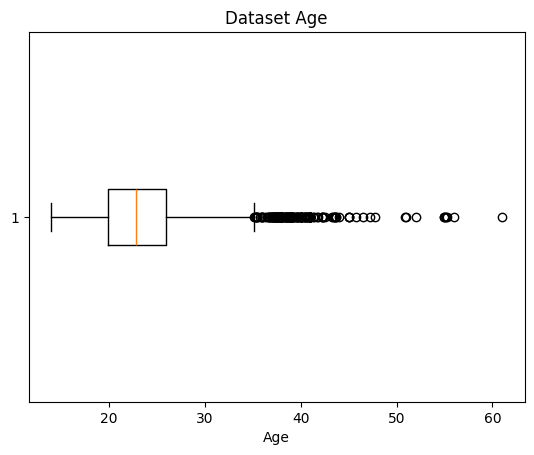

In [ ]:
# CHECKING FOR OUTLIERS
box_Plot('Age', "Dataset Age", "Age")

The ages listed in the plots are reasonable values.
It also has a lot of outliers; older people, but no early adolescents and children.

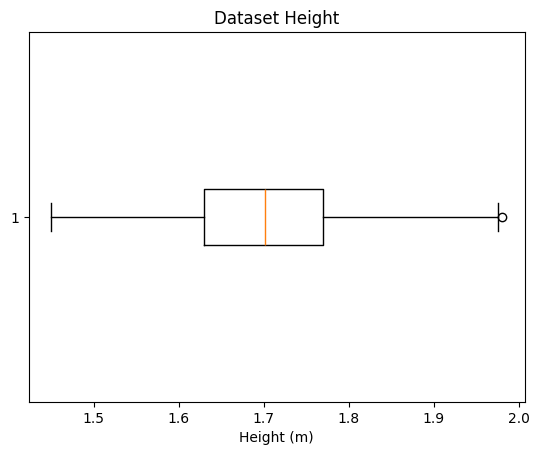

In [ ]:
# CHECKING FOR OUTLIERS
box_Plot('Height', 'Dataset Height', 'Height (m)')

The heights are all possible.

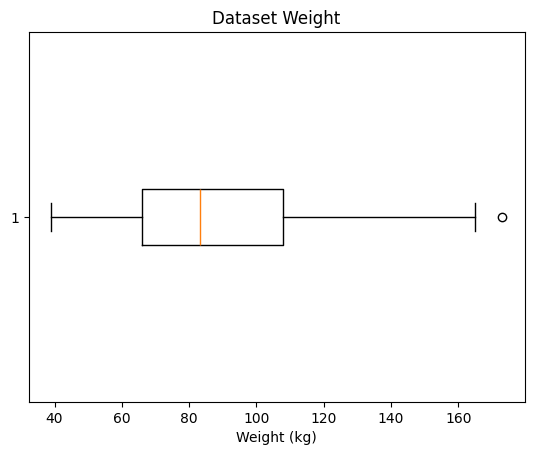

In [ ]:
# CHECKING FOR OUTLIERS
box_Plot('Weight', 'Dataset Weight', 'Weight (kg)')

The weight plots are all possible.



---


***Categorical Data Encoding***

In [ ]:
# Encoding columns to numeric values
df_encoded = df.copy()
le = LabelEncoder()

for col in ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

In [ ]:
df_encoded

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


***Null Hypothesis Testing***

Null Hypothesis: The most important behavioral contributors to obesity are diet and activity.
(p = 0.05)

Alternative Hypothesis: The most important behavioral contributors to obesity are relationships and interaction.





In [ ]:
chi2, p, dof, expected = chi2_contingency(df_encoded)
print("Chi-square statistic:", chi2)
print("p-value:", p) # p is 1 --> consistent with data, cannot reject null hypothesis

Chi-square statistic: 21797.204034021248
p-value: 1.0


In [ ]:
alpha = 0.05
if p <= alpha:
    print("Reject the null hypothesis (significant relationship)")
else:
    print("Fail to reject the null hypothesis (no significant relationship)")

Fail to reject the null hypothesis (no significant relationship)


***Visualizations***

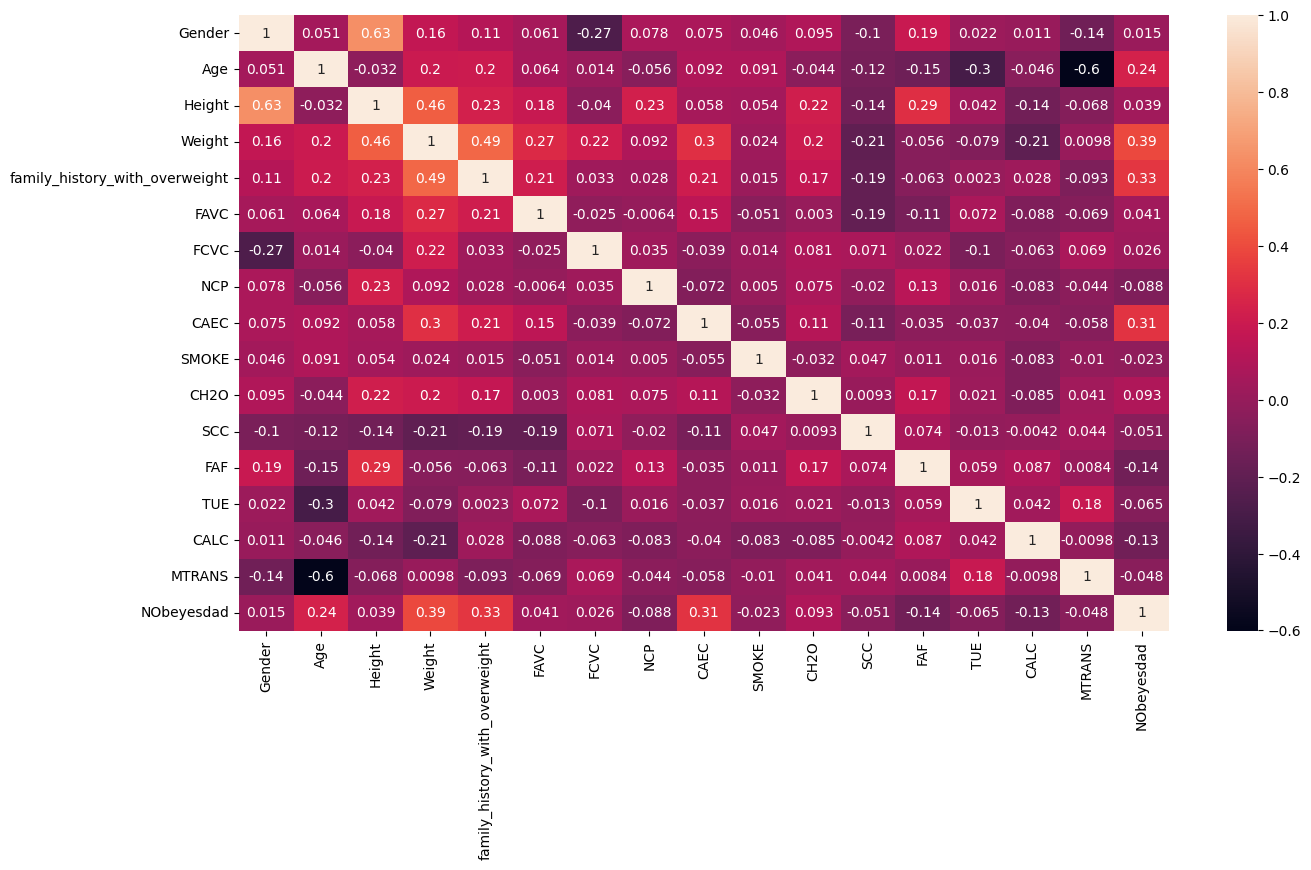

In [ ]:
# Creating heatmap to show correlations among features
corr = df_encoded.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot = True)
plt.show()

Heat maps can compare the correlations between variables in a dataset. The relationships between the other categories and NObeyesdad (the obesity classification) is generally not directly related; none are particularly close to 1 and -1, though some are close to 0.

***Observations***

For deeper observation, some important features that stand out will have their own plots that demonstrate correlations between two variables.




In [ ]:
# These are methods that help stay organized and prevent repetition of code
# ------------------------------
def make_bar(x_value, plot_title, x_label, size):
    x = df[x_value]
    plt.bar(x, y, width = size)
    plt.xlabel(x_label)
    plt.ylabel("Obesity Classification")
    plt.xticks(rotation = 90)
    plt.title(plot_title)
    plt.show()

In [ ]:
def make_scatter(x_value, plot_title, x_label):
    x = df[x_value]
    plt.scatter(x, y, alpha = 0.1)
    plt.xlabel(x_label)
    plt.ylabel("Obesity Classification")
    plt.xticks(rotation = 90)
    plt.title(plot_title)
    plt.show()

In [ ]:
def make_line(x_value, plot_title, x_label):
    x = df[x_value]
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel("Obesity Classification")
    plt.xticks(rotation = 90)
    plt.title(plot_title)
    plt.show()
# ------------------------------


*Note:*

Obesity Classifications:
* 0 = Insufficient Weight
* 1 = Normal Weight
* 2 = Obesity Type 2
* 3 = Obesity Type 1
* 4 = Obesity Type 3
* 5 = Overweight Level 1
* 6 = Overweight Level 2

In [ ]:
y = df_encoded['NObeyesdad']

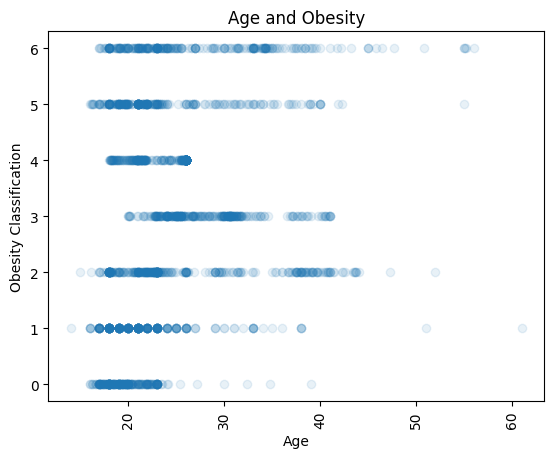

In [ ]:
make_scatter('Age', 'Age and Obesity', 'Age')

Most of the data set comes from people aged 17-34. Outliers tend to be older people (around 45+). This plot shows that age cannot categorize obesity.

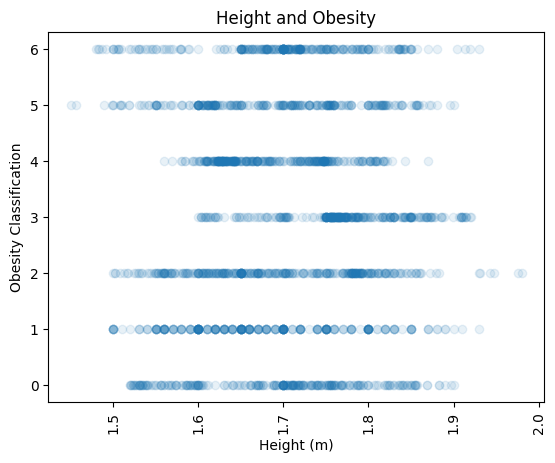

In [ ]:
make_scatter('Height', 'Height and Obesity', 'Height (m)')

Considering the spread and variance on the graph, height generally doesn't seem to have a direct affect to an obesity classification.

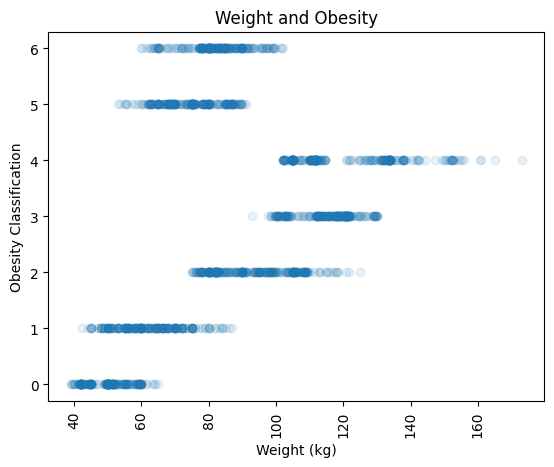

In [ ]:
make_scatter('Weight', 'Weight and Obesity', 'Weight (kg)')

As weight goes up, there's a higher classification of obesity. There does seem to be overlaps between weights of different categories of obesity.

These plots generally show that the relationships between each individual variable and obesity levels are not unilaterally related.

Other behavioral relationships are explored below:

* Diet Factors
* Habits

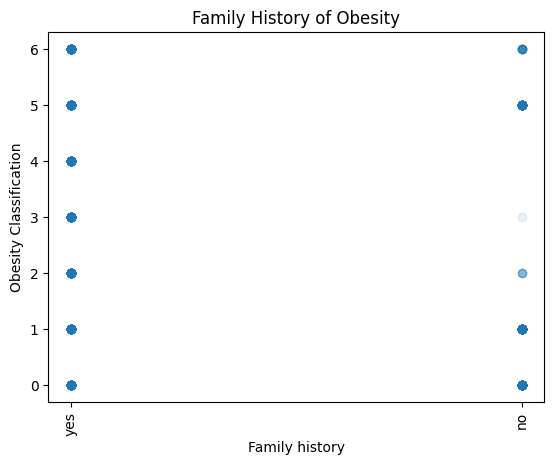

In [ ]:
make_scatter('family_history_with_overweight', 'Family History of Obesity', 'Family history')

People that have a family history with being overweight are more likely to be obese. There are no Obesity Level III classifications in the dataset when there is no direct family history of obesity.

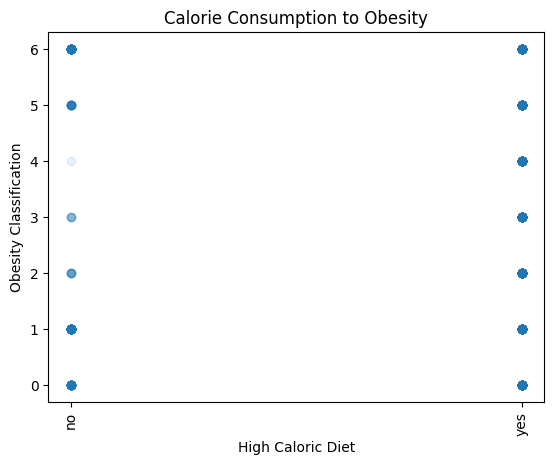

In [ ]:
# DIET FACTORS
make_scatter("FAVC", "Calorie Consumption to Obesity", "High Caloric Diet")

All levels are met regardless of high caloric diet, however what is considered high-calorie might change depending on the person. Caloric intake is different based on gender, physical activity, and size.

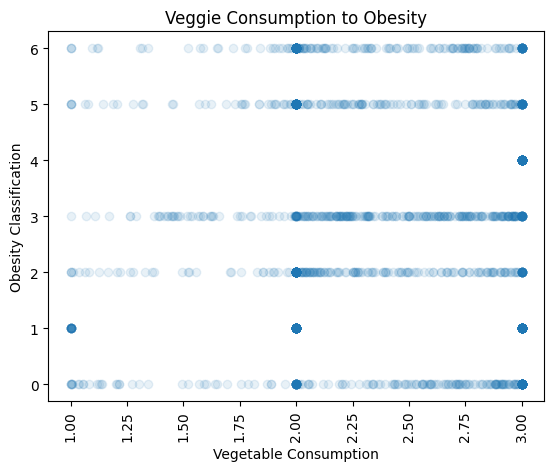

In [ ]:
make_scatter("FCVC", "Veggie Consumption to Obesity", "Vegetable Consumption")

Vegetable consumption doesn't seem to have much correlation to obesity.
There seems to be more people that are considered overweight despite eating more vegetables.

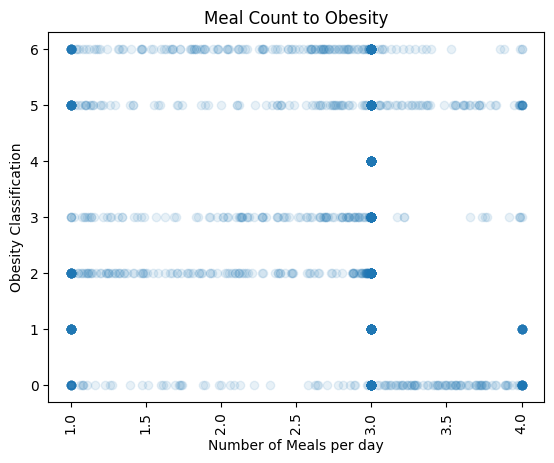

In [ ]:
make_scatter("NCP", "Meal Count to Obesity", "Number of Meals per day")

Most people are eating 3 meals a day.

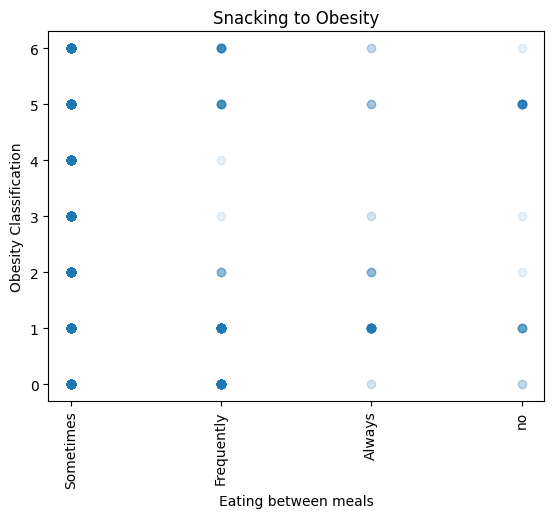

In [ ]:
make_scatter("CAEC", "Snacking to Obesity", "Eating between meals")

Unclear what snacking might be considered to different people. Some people might snack a lot in one sitting and consider it a snack, and others might only eat a little.

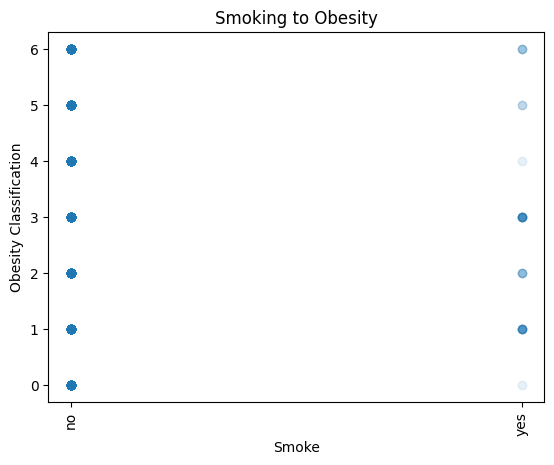

In [ ]:
#HABITS

make_scatter("SMOKE", "Smoking to Obesity", "Smoke")

There are less smokers in data set.

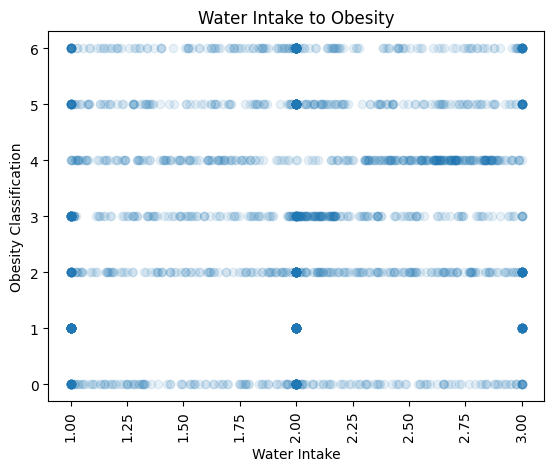

In [ ]:
make_scatter("CH2O", "Water Intake to Obesity", "Water Intake")

Not a big relationship between obesity classification and water intake.

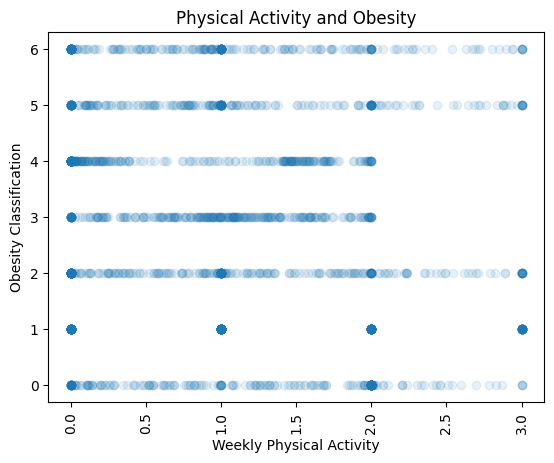

In [ ]:
make_scatter("FAF", "Physical Activity and Obesity", "Weekly Physical Activity")

Higher obesity classifications seem to workout less; no cases complete more than 2 physical activities per week.

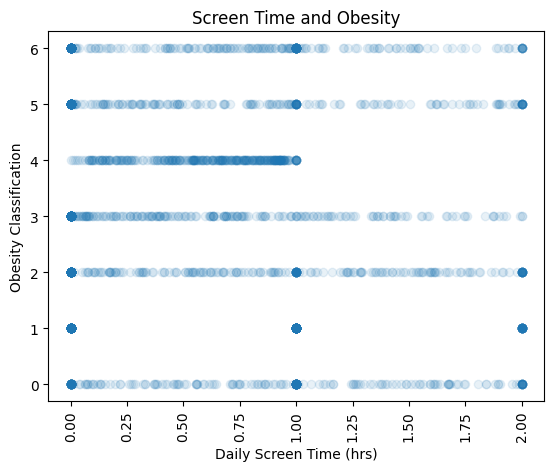

In [ ]:
make_scatter("TUE", "Screen Time and Obesity", "Daily Screen Time (hrs)")

Most people in this dataset have relatively low screen time. There seems to be less in the Obesity Category III classifiers.

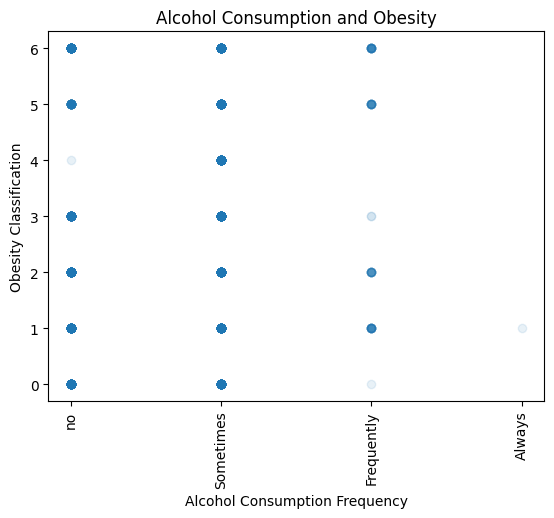

In [ ]:
make_scatter("CALC", "Alcohol Consumption and Obesity", "Alcohol Consumption Frequency")

Not many people drink alcohol frequently.

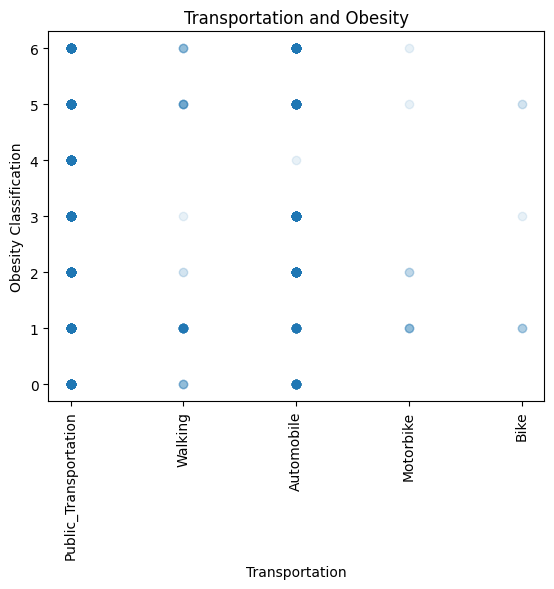

In [ ]:
make_scatter("MTRANS", "Transportation and Obesity", "Transportation")

Some of these methods of transportation are more accessible than others; public transportation, walking, and an automobile. While the other two can be used, they are less likely to.

The graph also shows that people who are obese generally avoid more physical activity like walking and biking. (See lines 2, 3, and 4)


---



Among all these relations, it's clear that although some aspects are related, not all cases of obesity are caused by one factor itself.

Below are some more plots to be conducted off of observations:

- family history and weight
- family history and meal count
- meal count and caloric meals
- meal count and snacking
- physical activity and transportation
- physical activity and meal tracking
- physical activity and family history

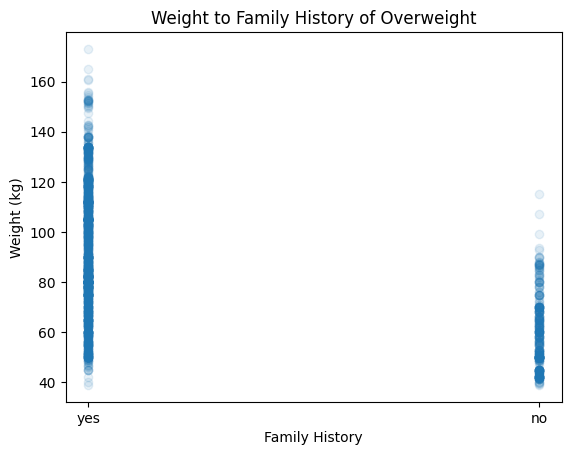

In [ ]:
plt.scatter(df['family_history_with_overweight'], df['Weight'], alpha = 0.1)
plt.xlabel("Family History")
plt.ylabel("Weight (kg)")
plt.title("Weight to Family History of Overweight")
plt.show()

This graph shows that people are more likely to be heavier with direct contact with someone in the family being overweight.

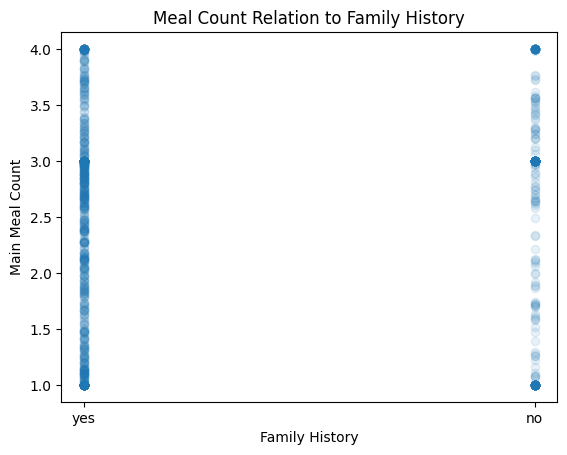

In [ ]:
plt.scatter(df['family_history_with_overweight'], df['NCP'], alpha = 0.1)
plt.xlabel("Family History")
plt.ylabel("Main Meal Count")
plt.title("Meal Count Relation to Family History")
plt.show()

The graph shows that people are more likely to eat more with contact to an overweight family member.

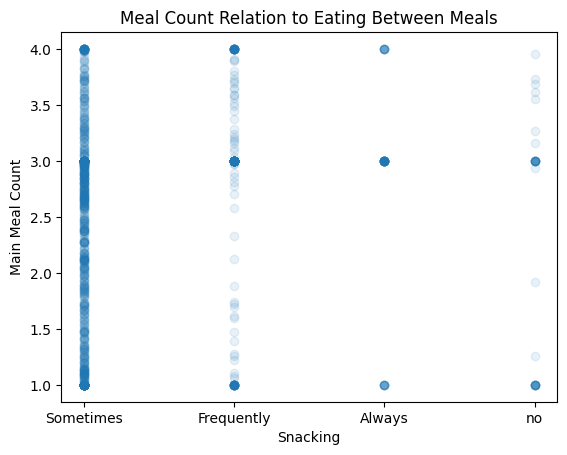

In [ ]:
plt.scatter(df['CAEC'], df['NCP'], alpha = 0.1)
plt.xlabel("Snacking")
plt.ylabel("Main Meal Count")
plt.title("Meal Count Relation to Eating Between Meals")
plt.show()

Most people eat between their meals, but not all the time. This is most likely different for each person's living conditions.

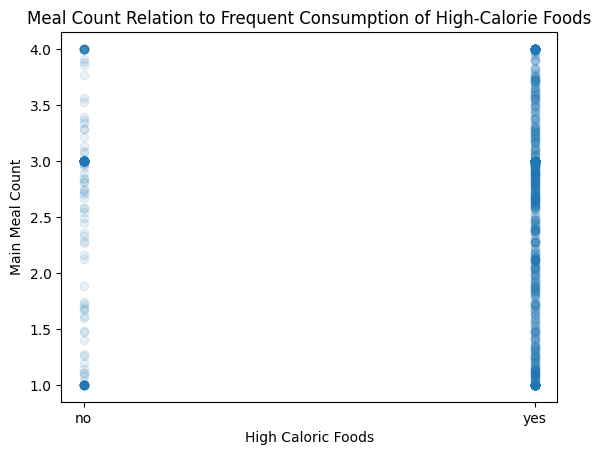

In [ ]:
plt.scatter(df['FAVC'], df['NCP'], alpha = 0.1)
plt.xlabel("High Caloric Foods")
plt.ylabel("Main Meal Count")
plt.title("Meal Count Relation to Frequent Consumption of High-Calorie Foods")
plt.show()

More people seem to eat high caloric foods more frequently. Around 3 is the most concentrated region and most normalized.

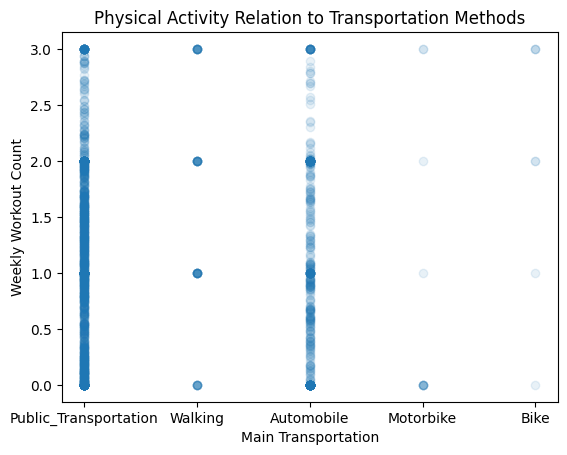

In [ ]:
plt.scatter(df['MTRANS'], df['FAF'], alpha = 0.1)
plt.xlabel("Main Transportation")
plt.ylabel("Weekly Workout Count")
plt.title("Physical Activity Relation to Transportation Methods")
plt.show()

Automobiles and public transportation seem much more accessible; this is accurate to real life because cars and public transportation make commuting much more efficient.

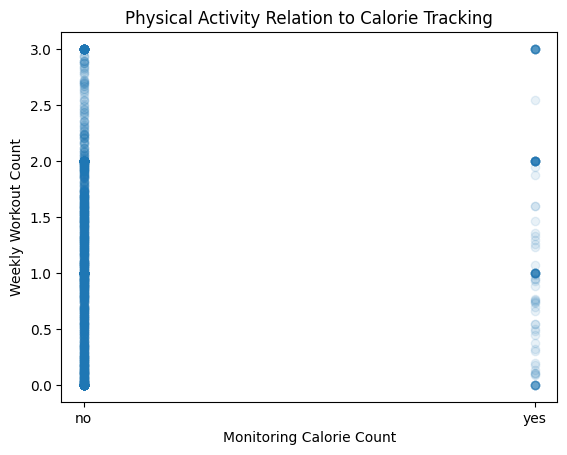

In [ ]:
plt.scatter(df['SCC'], df['FAF'], alpha = 0.1)
plt.xlabel("Monitoring Calorie Count")
plt.ylabel("Weekly Workout Count")
plt.title("Physical Activity Relation to Calorie Tracking")
plt.show()

This graph shows that a lot less people track their calories; might be for convenience reasons.

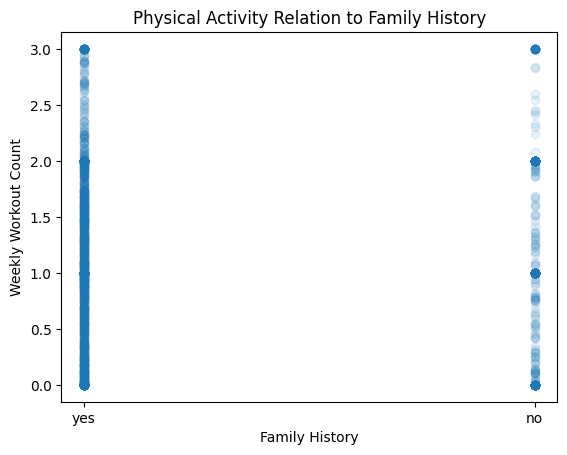

In [ ]:
plt.scatter(df['family_history_with_overweight'], df['FAF'], alpha = 0.1)
plt.xlabel("Family History")
plt.ylabel("Weekly Workout Count")
plt.title("Physical Activity Relation to Family History")
plt.show()

The graph shows that people seem more likely to work out when they have a family history with someone being overweight.

***Scaling + Modeling***


In [ ]:
scaler_standard = StandardScaler()
scaled_data_standard = scaler_standard.fit_transform(df_encoded)

*Elbow Plot*

In [ ]:
# Finding optimal cluster number
data = df_encoded.copy()

sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=2089).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_

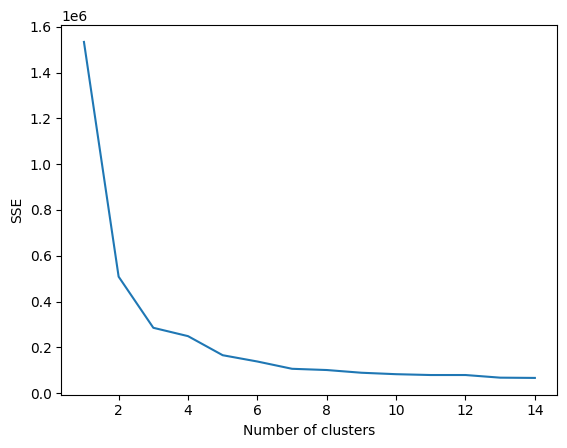

In [ ]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

An elbow plot can tell the best amount of values to include in one cluster when modeling use classification models. The optimal number of clusters seems to be around 7.

*PCA*

In [ ]:
# going to implement
pca = PCA(n_components=7)
X_pca = pca.fit_transform(scaled_data_standard)

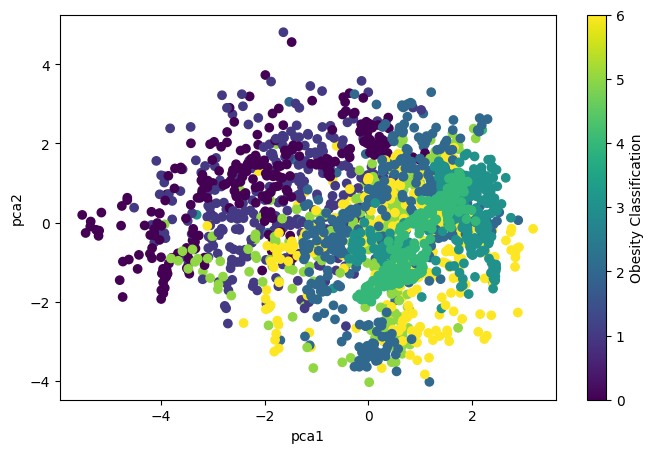

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.colorbar(label='Obesity Classification')
plt.show()

This model is really bunched together. Many groups seem to have similar habits or considerations despite their classification.

The Obesity Type III category is on the complete opposite direction from the Insufficient Weight category. This makes sense as those two should be completely different.

On the other hand, the other categories generally have a lot of overlapping occuring.

*t-SNE*

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_data_standard)
tsne_df = pd.DataFrame(data = tsne_results, columns=['Obesity Classification', 'Variables'])

In [ ]:
X_embedded = TSNE(n_components=2,init='pca',learning_rate='auto').fit_transform(tsne_df.values)

In [ ]:
tsne_df['Obesity Classification'] = df["NObeyesdad"]  #transplanting code

In [ ]:
tsne_result = pd.concat([
    tsne_df.reset_index()[['Obesity Classification','Variables']],
    pd.DataFrame(X_embedded,columns=['tsne1','tsne2'])
],axis=1)

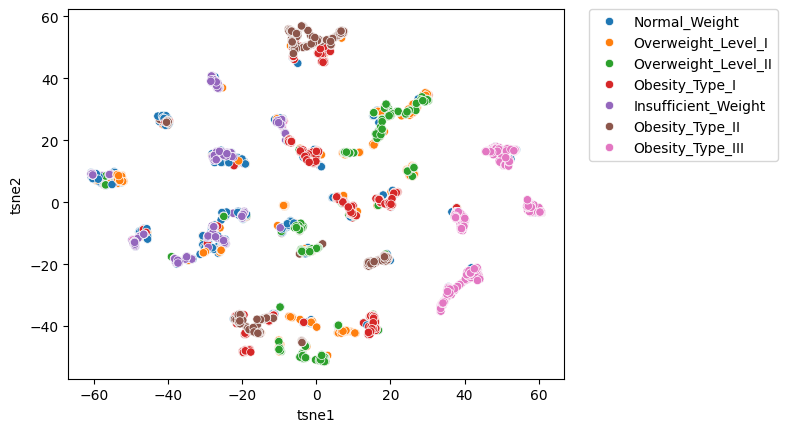

In [ ]:
sns.scatterplot(data = tsne_result, x = "tsne1", y = "tsne2",hue = "Obesity Classification")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Contrary to the PCA model, this one is well separated.

The Obesity Type III category is on the complete opposite direction from the Insufficient Weight category. This makes sense as those two should be completely different.

On the other hand, the other categories generally have a lot of overlapping occuring.



---


#Conclusions






General Findings:

Under these tests, the results are pretty inconclusive. It can certainly be determined that many factors play a role in being classified obese, but these are not directly defineable or directly associated to obesity. Weight is the main determiner of obesity, but other physical characteristics are also considered in a diagnosis. Activity, family background, and diet are important to regard in tracking and preventing obesity. However, in many cases they are related to one another in the form of an individual's relationships towards people or activities. Moreover, since the data came from a variety of people--though they were mostly younger in age--the classifications for things that are considered physical activity, a high calorie diet, or modes of transports, etc, were not the same or standardized.

Modeling:

During this process, two models were used: PCA and t-SNE. These models are classification models that break apart the data mathematically to group the closest related data points. Of the models used, t-SNE was the best at separating the data. However, both models showed similar information; the contrast between underweight plots and obese type III plots, and the overlap between members of other obesity classifications.

***Code and Data Availability***

*Code*
- Google Colab

*Libraries*
- numpy
- pandas
- matplotlib
- seaborn
- SKlearn

*Data Set*
https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

*Readings*
- https://www.semanticscholar.org/reader/f3cec32ad3afdc60376a26165c81acc5e6536c4d

- https://pmc.ncbi.nlm.nih.gov/articles/PMC7484407/

- https://link.springer.com/article/10.1007/s10995-018-02696-y

***Acknowledgements***

I would like to thank Manasa Kolavennu for helping guide me as I completed this research project. She directed me to the next step until the project was completed.

I would like to thank Navya Annapareddy for looking over my research, adjusting my models, and helping generate interpretations of the data.